In [957]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.integrate as integrate
from sympy import *
from scipy.integrate import trapz

# PARAMETER SETTINGS

In [958]:
# Assumptions
h = 100      # crust thickness; km
R_cmb = 1830 # core radius; km
T_s = 220    # surface temperature; K

# Observations
R = 3389         # mars radius; km
M = 6.421e14     # mars mass 
I = 0.364*M*R**2  # mars moment of inertia

## Temperature Profile

In [959]:
path = 'Figure/'

In [960]:
def temp_profile(v_r,x_r,T_s,R,R_cmb):
    rr = np.arange(0,R-R_cmb+1)
    T = np.zeros(np.size(rr))
    T[0:x_r[0]+1] = T_s + v_r[0] *  rr[0:x_r[0]+1]
    T[x_r[0]+1:x_r[1]+1] = T[x_r[0]] + v_r[1]\
                *(rr[x_r[0]+1:x_r[1]+1] - x_r[0])
    T[x_r[1]+1:] = T[x_r[1]] + v_r[2]\
                *(rr[x_r[1]+1:] - x_r[1])
    print('T1= ',T[x_r[0]])
    print('T2= ',T[x_r[1]])
    print('T3= ',T[-1])
    return T

### cold temperature

In [961]:
v_r_c = [2.7,2.3,0.12]    # K/km
x_r_c = [450,550]         # km
T_c = temp_profile(v_r_c,x_r_c,T_s,R,R_cmb)

T1=  1435.0
T2=  1665.0
T3=  1786.08


### hot temperature

In [962]:
v_r_h = [6.4,3.4,0.12]    # K/km
x_r_h = [100,400]         # km
T_h = temp_profile(v_r_h,x_r_h,T_s,R,R_cmb)

T1=  860.0
T2=  1880.0
T3=  2019.08


### average profile

In [963]:
T_a = (T_c + T_h)/2

### plot two temperature profiles

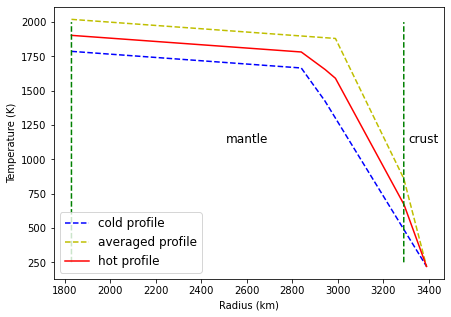

In [964]:
rr = np.arange(R_cmb,R+1)
plt.figure(figsize = (7,5))
plt.xlabel('Radius (km)')
plt.ylabel('Temperature (K)')
plt.plot(rr,T_c[::-1],'b--')
plt.plot(rr,T_h[::-1],'y--')
plt.plot(rr,T_a[::-1],'r')
plt.plot((R-h)*np.ones(2000-250),range(250,2000),'g--')
plt.plot((R_cmb)*np.ones(2000-250),range(250,2000),'g--')
plt.legend(('cold profile','averaged profile','hot profile'),fontsize=12, numpoints=1,loc=3)
plt.text(R-h*4/5,(max(T_h)+min(T_c))/2,'crust',fontsize = 12)
plt.text(R_cmb+(R-R_cmb)/2-h,(max(T_h)+min(T_c))/2,'mantle',fontsize = 12)
plt.savefig(path+'temperature.png',dpi=300)

## Pressure Profile

In [965]:
dp_r = 0.012    # GPa/km

P = (R-rr)*dp_r
print('P_start = ',P[R-h-R_cmb],' GPa')
print('P_end = ',P[0],' GPa')

P_start =  1.2  GPa
P_end =  18.708000000000002  GPa


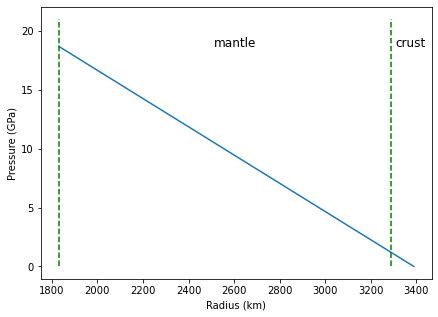

In [966]:
plt.figure(figsize = (7,5))
plt.xlabel('Radius (km)')
plt.ylabel('Pressure (GPa)')
plt.plot(rr,P)
plt.plot((R-h)*np.ones(22),range(0,22),'g--')
plt.plot((R_cmb)*np.ones(22),range(0,22),'g--')
plt.text(R-h*4/5,max(P),'crust',fontsize = 12)
plt.text(R_cmb+(R-R_cmb)/2-h,max(P),'mantle',fontsize = 12)
#plt.legend(('cold profile','hot profile'),fontsize=12, numpoints=1,loc=3)
plt.savefig(path+'pressure.png',dpi=300)

## Generate P-T Path for Calculation

In [967]:
PT = np.zeros([np.size(P[0:R-h-R_cmb]),2])
PT[:,0] = P[R-h-R_cmb-1::-1]*10**4
PT[:,1] = T_h[h+1:R-R_cmb+1]
print('P range: ',PT[0,0],PT[-1,0])
print('T_c range: ',PT[0,1],PT[-1,1])
np.savetxt('path_c.txt', PT, fmt="%.2f", delimiter='        ') 
PT[:,1] = T_h[h+1:R-R_cmb+1]
print('T_h range: ',PT[0,1],PT[-1,1])
np.savetxt('path_h.txt', PT, fmt="%.2f", delimiter='        ') 
PT[:,1] = T_a[h+1:R-R_cmb+1]
print('T_a range: ',PT[0,1],PT[-1,1])
np.savetxt('path_a.txt', PT, fmt="%.2f", delimiter='        ') 

P range:  12120.0 187080.00000000003
T_c range:  863.4 2019.08
T_h range:  863.4 2019.08
T_a range:  678.05 1902.58


# CALCULATION and PLOT

## Phase Composition of Different Models

In [968]:
# radiu list of mantle
rr_m = rr[0:R-R_cmb-h]

In [969]:
def load_data(filename):
    data_np = np.loadtxt(filename,skiprows = 9)
    data_np = np.nan_to_num(data_np)
    data_dict = {}
    data_dict['P'] = data_np[::-1,0]
    data_dict['T'] = data_np[::-1,1]
    data_dict['rho'] = data_np[::-1,2]
    data_dict['Oli'] = data_np[::-1,3]
    data_dict['Wad'] = data_np[::-1,4]
    data_dict['Ring'] = data_np[::-1,5]
    data_dict['Pv'] = data_np[::-1,6]
    data_dict['Wus'] = data_np[::-1,7]
    data_dict['Cpx'] = data_np[::-1,8]
    data_dict['Opx'] = data_np[::-1,9]
    data_dict['Aki'] = data_np[::-1,10]
    data_dict['Gt_maj'] = data_np[::-1,11]
    data_dict['c'] = data_np[::-1,12]
    data_dict['Vp'] = data_np[::-1,13]
    data_dict['Vs'] = data_np[::-1,14]
    return data_dict

In [970]:
def plot_phase(rr_m,data,path):
    plt.figure(figsize = (12,10))
    plt.subplot(211)
    plt.axis([min(rr_m), max(rr_m),0,100.])
    plt.xlabel('Radius (km)')
    plt.ylabel('Single Mineral Composition (Vol%)')
    plt.subplot(212)
    plt.axis([min(rr_m), max(rr_m),0,100.])
    plt.xlabel('Radius (km)')
    plt.ylabel('Total Mineral Composition (Vol%)')
    # plot four edges
    #plt.hlines(0, min(rr_m), max(rr_m),color="black")
    #plt.hlines(100, min(rr_m), max(rr_m),color="black")
    #plt.vlines(min(rr_m), 0, 100,color="black")
    #plt.vlines(max(rr_m), 0, 100,color="black")
    # find all keys
    flag_start = 3    # start flag, trace the first component position
    flag_end = -4     # end flag, trace the end component position
    keys = list(data.keys())[flag_start:flag_end]
    data_sum = np.zeros(np.size(data[keys[0]]))
    # iteration to plot
    for key in keys:
        data_this = data[key] + np.hstack([data[key][1:],0])+np.hstack([0,data[key][0:-1]]) # judge whether plot
        data_sum += data[key]
        plt.subplot(211)
        plt.plot(rr_m,data[key])
        plt.subplot(212)
        plt.plot(rr_m[data_this>0],data_sum[data_this>0])
        # text
        if len(data[key][data[key]>0]) > 0:
            x =int( (rr_m[data[key]>0][0]+rr_m[data[key]>0][-1])/2 )
            y = data_sum[rr_m==x] - 0.5*data[key][rr_m==x]
            plt.text(x,y,key,fontsize = 12)
    plt.subplot(211)
    plt.legend(tuple(keys),fontsize=12, numpoints=1,loc=2)
    plt.subplot(212)
    plt.legend(tuple(keys),fontsize=12, numpoints=1,loc=2)
    plt.savefig(path+'phase_'+data['filename']+'.png',dpi=300)

### MAK model

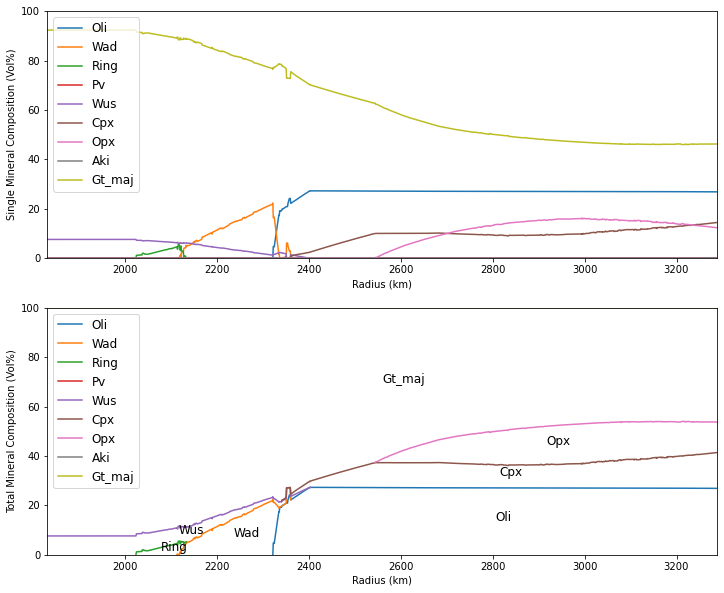

In [971]:
MAK = load_data('MAK/MAK_1.tab')
MAK['filename'] = "MAK"
plot_phase(rr_m,MAK,path)

### DW model

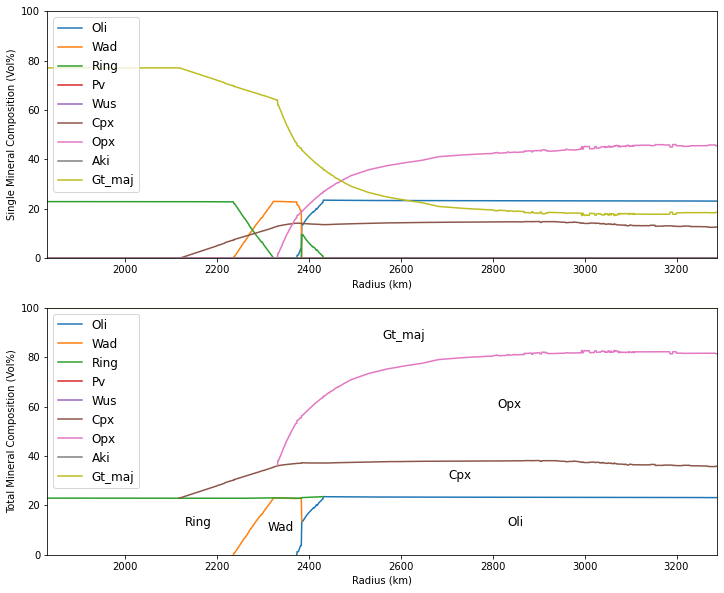

In [972]:
DW = load_data('DW/DW_1.tab')
DW['filename'] = "DW"
plot_phase(rr_m,DW,path)

### EH45 model

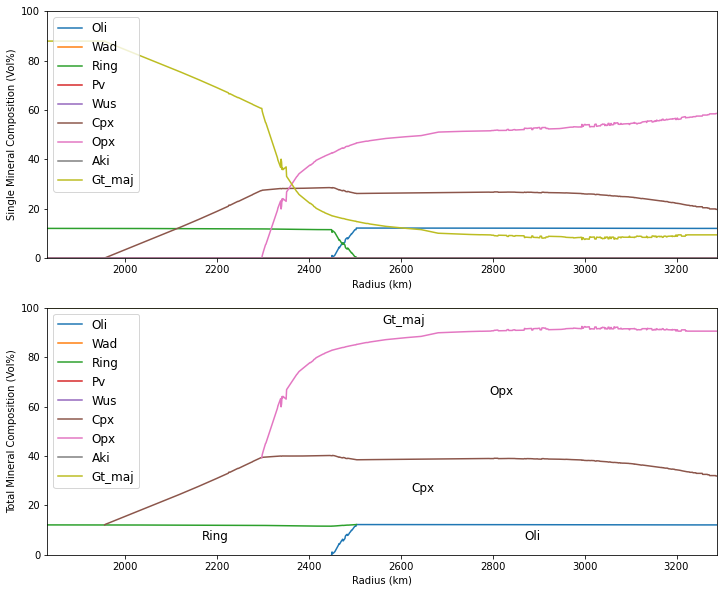

In [973]:
EH45 = load_data('EH45/EH45_1.tab')
EH45['filename'] = "EH45"
plot_phase(rr_m,EH45,path)

## Property Comparison

In [974]:
def plot_properties(rr_m,dataS,path):
    plt.figure(figsize = (12,7))
    legS = []
    for i in range(1,len(dataS)+1):
        data = dataS[i]
        # plot density variation
        plt.subplot(221)
        plt.xlabel('Radius (km)')
        plt.ylabel('Density ($kg/m^{3}$)')
        plt.plot(rr_m,data['rho'])
        # plot sound velocity variation
        plt.subplot(222)
        plt.xlabel('Radius (km)')
        plt.ylabel('Sound Velocity ($km/s$)')
        plt.plot(rr_m,data['c'])
        # plot P velocity variation
        plt.subplot(223)
        plt.xlabel('Radius (km)')
        plt.ylabel('Vp ($km/s$)')
        plt.plot(rr_m,data['Vp'])
        # plot S velocity variation
        plt.subplot(224)
        plt.xlabel('Radius (km)')
        plt.ylabel('Vs ($km/s$)')
        plt.plot(rr_m,data['Vs'])
        legS.append(data['filename'])
        plt.legend(tuple(legS),fontsize=12, numpoints=1,loc=3)
    plt.subplot(221)
    plt.legend(tuple(legS),fontsize=12, numpoints=1,loc=3)
    plt.subplot(222)
    plt.legend(tuple(legS),fontsize=12, numpoints=1,loc=3)
    plt.subplot(223)
    plt.legend(tuple(legS),fontsize=12, numpoints=1,loc=3)
    plt.subplot(224)
    plt.legend(tuple(legS),fontsize=12, numpoints=1,loc=3)
    plt.savefig(path+'property.png',dpi=300)
        

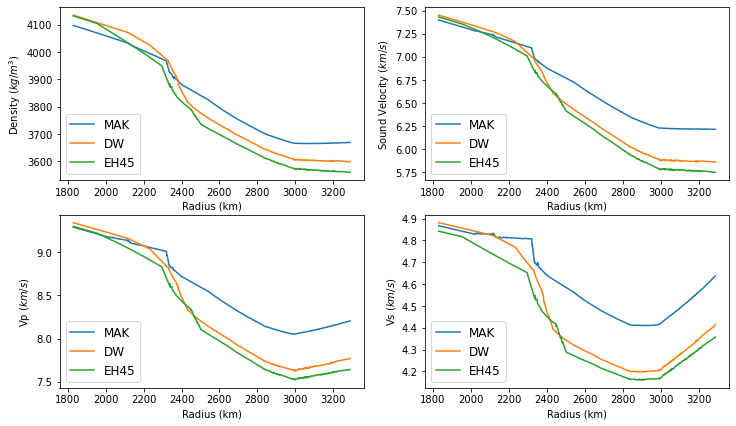

In [975]:
dataS = {}
dataS[1] = MAK
dataS[2] = DW
dataS[3] = EH45
plot_properties(rr_m,dataS,path)

## Density of Core and Crust

In [976]:
# Assumptions
h = 100      # crust thickness; km
R_cmb = 1830 # core radius; km
T_s = 220    # surface temperature; K

# Observations
R = 3389         # mars radius; km
M = 6.421e14     # mars mass 
I = 0.365*M*R**2  # mars moment of inertia

In [977]:
# lesson: should use (x,y) in order
def density_c_m(rho,M,I,R,R_cmb,h,rr_m):
    rho_crust, rho_core = symbols("x y")
    a = 4/3*np.pi
    b = 8/15*np.pi
    eq = []
    
    I1 = 4*np.pi*np.trapz(rho*rr_m**2, rr_m)
    I2 = 8/3*np.pi*np.trapz(rho*rr_m**4, rr_m)

    eq.append(M - a*rho_core*R_cmb**3 -I1 - a*rho_crust*(R**3-((R-h)**3)))
    eq.append(I - b*R_cmb**5*rho_core-I2-b*(R**5-(R-h)**5)*rho_crust)
    res = list(linsolve(eq, [rho_crust,rho_core]))
    return res
    

In [978]:
density_MAK = density_c_m(MAK['rho'],M,I,R,R_cmb,h,rr_m)
print('Crust density (MAK model) = ',density_MAK[0][0])
print('Core density (MAK model) = ',density_MAK[0][1])

Crust density (MAK model) =  1975.16309022144
Core density (MAK model) =  5716.35752697439


In [979]:
density_DW = density_c_m(DW['rho'],M,I,R,R_cmb,h,rr_m)
print('Crust density (DW model) = ',density_DW[0][0])
print('Core density (DW model) = ',density_DW[0][1])

Crust density (DW model) =  2235.57488475922
Core density (DW model) =  5751.57592768594


In [980]:
density_EH45 = density_c_m(EH45['rho'],M,I,R,R_cmb,h,rr_m)
print('Crust density (EH45 model) = ',density_EH45[0][0])
print('Core density (EH45 model) = ',density_EH45[0][1])

Crust density (EH45 model) =  2418.85254412968
Core density (EH45 model) =  5815.41378920313
